/Users/Mathian/Documents/IA/Vision_par_ordinateur/VisualChess/code


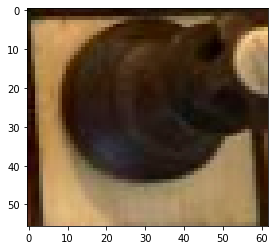

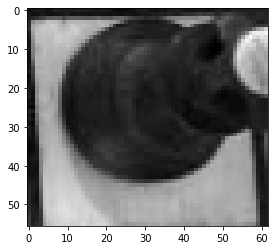

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
print(os.getcwd())

img = cv2.imread('.././photos_test/square/black_on_white_g.png',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.show()
plt.imshow(img_gray, cmap = 'gray')
plt.show()
